# CSV Read test

In [14]:
import numpy as np

### Read CSV

In [19]:
import positioning.dummy_picoscope as p

In [20]:
# import importlib

In [21]:
# importlib.reload(p)

In [54]:
data = p.Picoscope('./data/fishhook_moving_one/store_channeldata_PositionStep_0.csv').stream()

Initiating Dummy Picoscope


In [56]:
vals = [ch.reshape((-1,)) for ch in np.hsplit(data, data.shape[1])]

### Zero Crossing

In [57]:
from positioning.zero_crossing import Est_ZC_stage_1

In [58]:
fs = 1e6
window_size = 500
multiplier = 10  # std_noise_multiplier

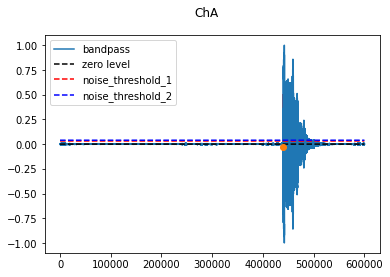

In [59]:
index_A = Est_ZC_stage_1(vals[0], window_size, fs, multiplier, run_plot=True, plot_title='ChA')

In [60]:
# index_AA = Est_ZC_stage_1(vals[0][index_A+100000:], window_size, fs, multiplier, run_plot=True, plot_title='ChA')

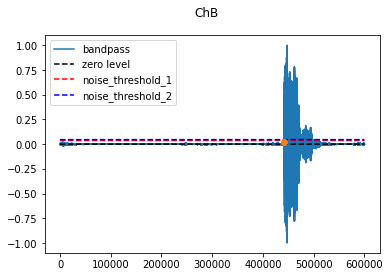

In [61]:
index_B = Est_ZC_stage_1(vals[1], window_size, fs, multiplier, run_plot=True, plot_title='ChB')

In [62]:
index_C = Est_ZC_stage_1(vals[2], window_size, fs, multiplier)

In [63]:
index_D = Est_ZC_stage_1(vals[3], window_size, fs, multiplier)

In [64]:
index_E = Est_ZC_stage_1(vals[4], window_size, fs, multiplier)

In [65]:
(index_B - index_A) / fs * 1500, (index_C - index_A) / fs * 1500, (index_D - index_A) / fs * 1500, (index_E - index_A) / fs * 1500, "meters"

(3.3465, 3.264, 3.3314999999999997, 2.4555, 'meters')

### Triangulation

In [66]:
from positioning.triangulate import gps_solve

In [67]:
v_s = 1500

stations = np.array([ # Hydrophone Locations
    [1.70, 0.0, 0.75], 
    [0.80, 8.85, 0.25], 
    [0.0, 4.25, 0.55], 
    [3.0, 4.50, 1.20]
])


d1, d2, d3, d4 = [
    (index_B - index_A) / fs * v_s,
    (index_C - index_A) / fs * v_s,
    (index_D - index_A) / fs * v_s,
    (index_E - index_A) / fs * v_s
]

distances_to_station = [d1, d2, d3, d4]
print(gps_solve(distances_to_station, stations))
print('\033[95m' + 'Co-ordinates of the pinger ' + '\033[95m')
print ('\033[0m')
pinger_coordinates_multi = gps_solve(distances_to_station, landmarks)

[ 2.16699015  4.53623781 -0.72445939]
Co-ordinates of the pinger 



# IMU TEst

In [1]:
import numpy as np

In [3]:
data = np.loadtxt('./data/vn1000/square_motion_with_turn.csv', skiprows=1, delimiter=',')

In [4]:
data.shape

(400, 6)

In [5]:
import matplotlib.pyplot as plt

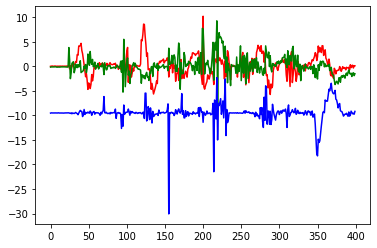

In [6]:
plt.plot(data[:, 3], color='r')
plt.plot(data[:, 4], color='g')
plt.plot(data[:, 5], color='b')

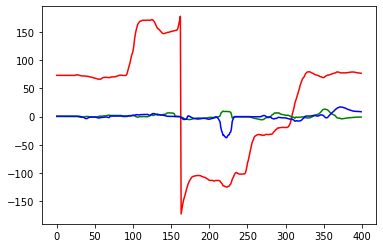

In [7]:
plt.plot(data[:, 0], color='r')
plt.plot(data[:, 1], color='g')
plt.plot(data[:, 2], color='b')

# Picoscope test

In [54]:
import matplotlib.pyplot as plt

In [55]:
import numpy as np

In [56]:
A = np.genfromtxt('ChannelA.csv', delimiter=',')

In [57]:
A.shape

(1000000,)

In [58]:
A.mean()

-4.380523721536633e-20

In [59]:
((A - A.mean())**2).mean()

9.458991094255212e-05

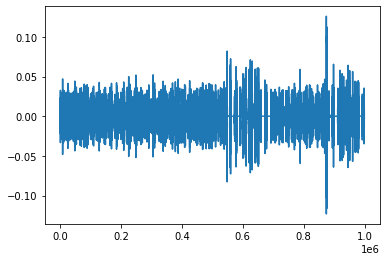

In [60]:
plt.plot(A[1000:])

In [61]:
B = A[1000:]

In [62]:
t = np.arange(len(B)+1)[1:]

In [63]:
yf = np.fft.fft(B)

In [64]:
xf = np.fft.fftfreq(t.shape[-1])

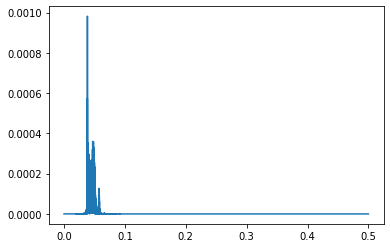

In [65]:
# Number of samplepoints
N = int(len(B))
# sample spacing
T = 1.0
x = np.linspace(0.0, N*T, N)
y = A
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

In [66]:
A = np.genfromtxt('ChannelC.csv', delimiter=',')

In [67]:
A.shape

(1000000,)

In [68]:
A.mean()

-1.123656723223121e-18

In [69]:
((A - A.mean())**2).mean()

0.0149816907880325

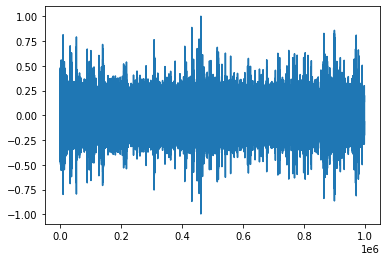

In [70]:
plt.plot(A[1000:])

In [71]:
B = A[1000:]

In [72]:
t = np.arange(len(B)+1)[1:]

In [73]:
yf = np.fft.fft(B)

In [74]:
xf = np.fft.fftfreq(t.shape[-1])

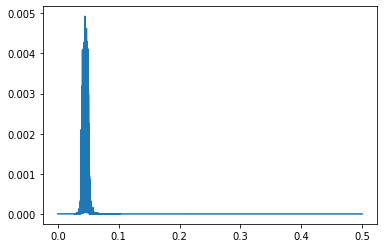

In [75]:
# Number of samplepoints
N = int(len(B))
# sample spacing
T = 1.0
x = np.linspace(0.0, N*T, N)
y = A
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

# nps read/write

In [5]:
import numpy as np

In [6]:
from positioning.file_helper import ChunkedNPStackWriter

In [12]:
with ChunkedNPStackWriter('a.nps') as w:
    w.write(np.arange(20))
    w.write(np.random.rand(5,5))
    w.write(np.arange(10))

Opening npstack file


In [1]:
import positioning.dummy_picoscope as dp

In [13]:
with dp.Picoscope('a.nps') as p:
    for arr in p:
        print(arr)

Opening npstack file
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[[0.8666639  0.89095072 0.83679791 0.56305509 0.76872913]
 [0.56156175 0.82993474 0.27240741 0.68747896 0.69126887]
 [0.04236655 0.67865627 0.84287143 0.30050445 0.52431097]
 [0.03396911 0.98842329 0.24746432 0.77724865 0.1282601 ]
 [0.8479238  0.12946793 0.42100704 0.07659747 0.13646174]]
[0 1 2 3 4 5 6 7 8 9]
